# Setting up environment

In [ ]:
# Ensure you are using the GPU
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Set up mixed precision training
from tensorflow.keras import mixed_precision  # Remove 'experimental'
policy = mixed_precision.Policy('mixed_float16')
# For TensorFlow versions where 'set_policy' is unavailable, use:
mixed_precision.set_global_policy(policy)  # Update to set global policy

# Efficient data loading
import tensorflow_datasets as tfds
def load_data():
    ds = tfds.load('cifar10', split='train', as_supervised=True)
    ds = ds.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), y))
    ds = ds.batch(64)
    return ds

# Clear unused variables
import gc
gc.collect()

Num GPUs Available:  1


0

Run to confirm GPU type

In [ ]:
# Check GPU availability and type
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(f"GPU device: {device_name}")

# Check TPU availability (if selected)
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print(f"Running on TPU: {tpu.cluster_spec().as_dict()['worker']}")
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU")

GPU device: /device:GPU:0
Not connected to a TPU


# Download Statements


In [ ]:
!pip install umap-learn
!pip install sentence-transformers
!pip install faiss-cpu
!pip install pymupdf
!pip install spacy_cleaner
!pip install datasets
!pip install -U spacy-cleaner --quiet
!pip install bertopic -q
!pip install sentence_transformers -q
!pip install hdbscan -q
!pip install --upgrade huggingface_hub
!pip install scikit-learn umap-learn sentence_transformers faiss-cpu plotly matplotlib
!git clone https://github.com/huggingface/text-clustering.git
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.0/419.0 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.23.5
    Uninstalling huggingface-hub-0.23.5:
      Successfully uninstalled huggingface-hub-0.23.5
Cloning into 'text-clustering'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 130 (delta 10), reused 7 (delta 7), pack-reused 98
Receiving objects: 100% (130/130), 777.79 KiB | 31.11 MiB/s, done.
Resolving deltas: 100% (44/44), done.


# Adding Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Change to a directory in your Google Drive
os.chdir('/content/drive/My Drive/REU Data Folder')

# List files in the current directory
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Code	  'Literature with Categories.csv'   processed.pkl			    'REU Papers'
 Figures   processed.csv		    'REU 2024 Literature - Literature.csv'   sentences.csv


# Meta Data on Papers

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/My Drive/REU Data Folder/REU 2024 Literature - Literature.csv')

# Adds titles to data
titles = df['Title'].tolist()
data = {
    'titles': titles
}

# Define categories and keywords
categories = {
    'ASD': ['Autism', 'Autistic', 'ASD', 'Spectrum', 'Asperger', "Asperger's"],
    'ADHD': ['ADHD', 'ADD ', 'Attention', 'Stimulants'],
    'Dyslexia': ['Dyslexia', 'Learning Disorder', 'Learning Disability',
                 'Learning Disabilities'],
    'Neurodivergence': ['Neurodivergence', 'Neurodiverse', 'Neurodivergent',
                        'Neurodiversity', 'Neuropsychological', 'Developmental']
}

# Create a function to categorize titles
def categorize_title(title):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in title.lower():
                return category
    return 'Neurodivergence'

# Apply the function to create the new column
df['Category'] = df['Title'].apply(categorize_title)

# Display the DataFrame with proper formatting
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.expand_frame_repr', False)  # Prevent DataFrame from wrapping
print(df)

# Save the updated DataFrame back to a CSV file
df.to_csv('/content/drive/My Drive/REU Data Folder/Literature with Categories.csv', index=False)

# Verify the new column has been added
# print(df.head())

                                                 Link                                              Title                                             Author                                   Abstract/Summary                                           Citation Category
0   https://heinonline.org/HOL/Page?handle=hein.jo...  A Hard Pill to Swallow: The Need to Identify a...                    Corey Lane and Mark David Chong  This paper explores the nature of Attention-De...  Lane, C. J., & Chong, M. D. (2019). A hard pil...     ADHD
1   https://link.springer.com/article/10.1007/s124...  A Prospective Look at Substance Use and Crimin...  Virginia De Sanctis, Jeffrey Newcorn, and Jeff...  Children with attention-deficit/hyperactivity ...  De Sanctis, V. A., Newcorn, J. H., & Halperin,...     ADHD
2   https://link.springer.com/article/10.1007/s404...  A Scoping Review of Autism Spectrum Disorder a...  Kirsten Railey, Abigail Love, and Jonathan Cam...  The authors conducted a scoping review of 

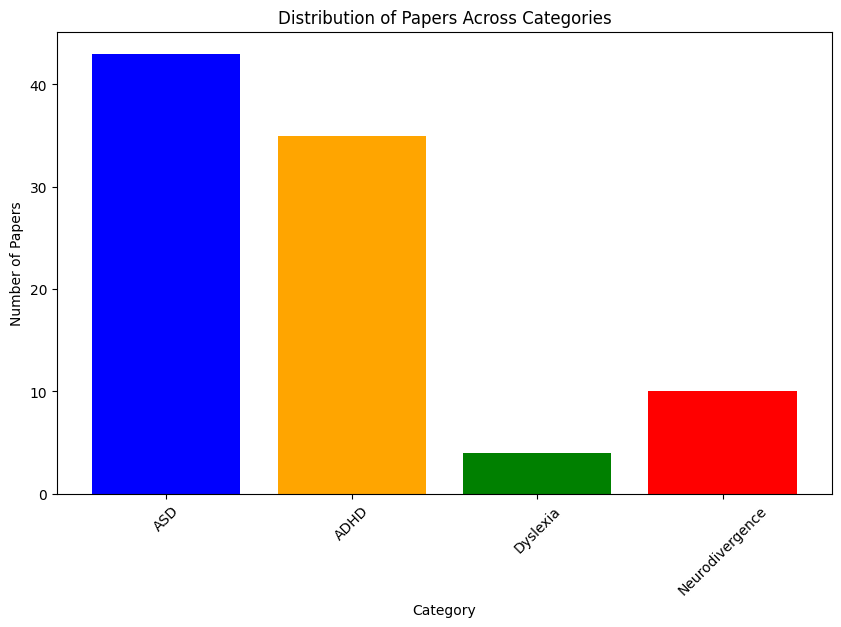

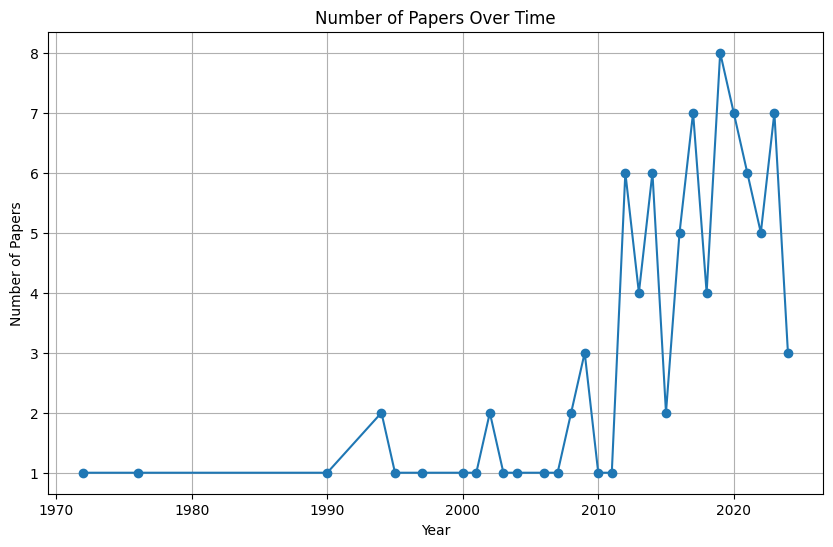

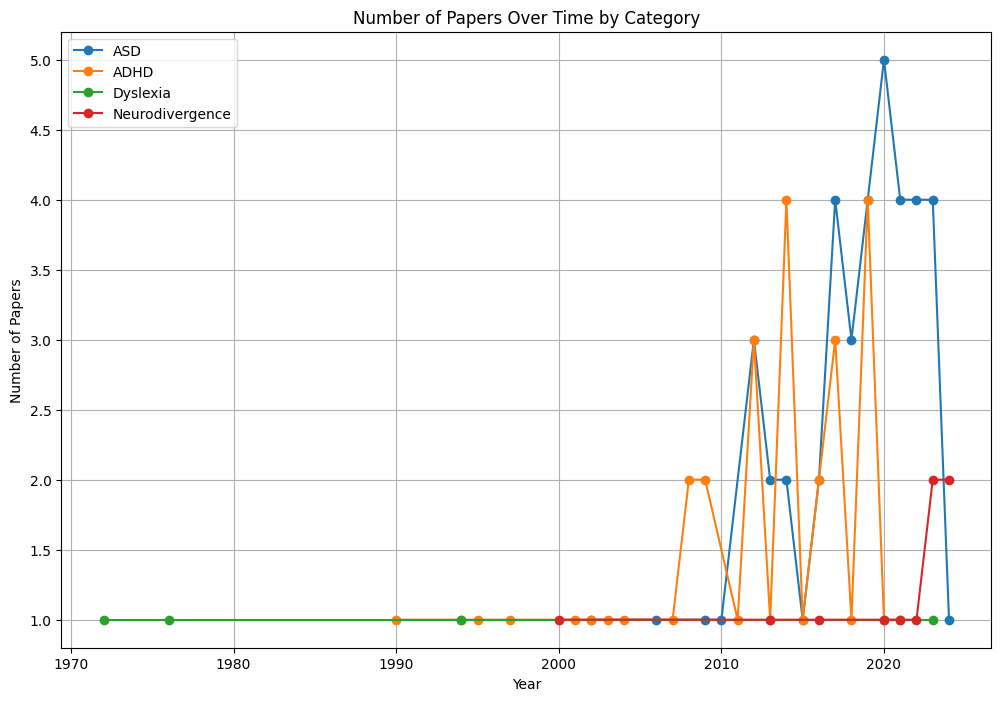

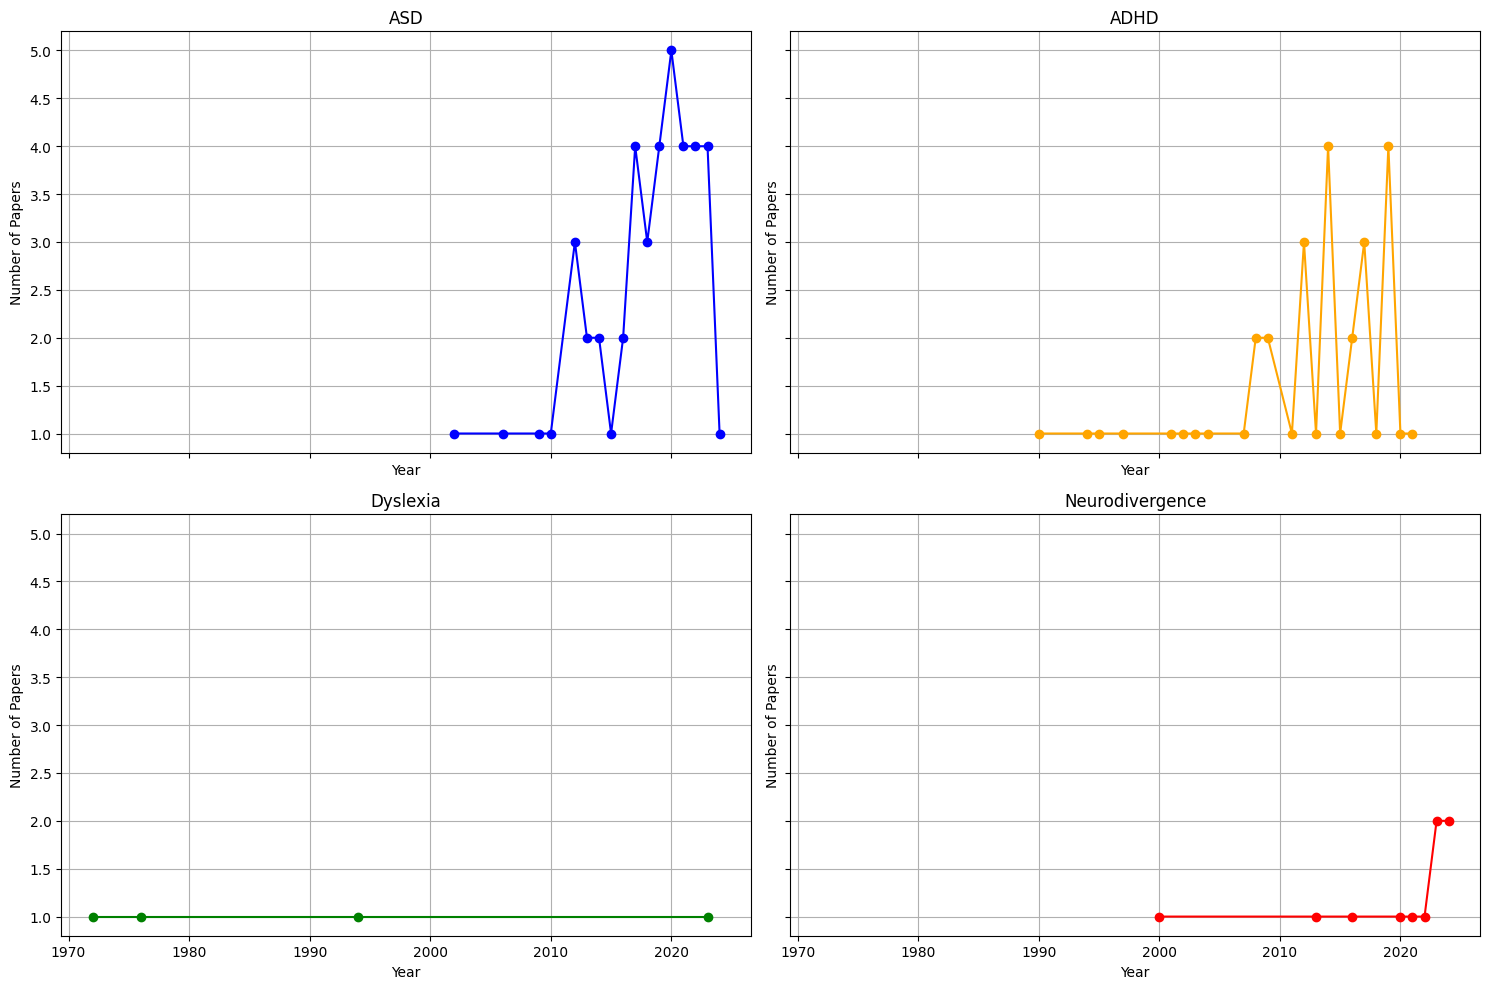

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Function to count categories
def count_categories(categories):
    category_counts = {'ASD': 0, 'ADHD': 0, 'Dyslexia': 0, 'Neurodivergence': 0}
    for category in categories:
        category_counts[category] += 1
    return category_counts

# Function to categorize titles
def categorize_titles(titles, categories):
    categorized_titles = {'ASD': [], 'ADHD': [], 'Dyslexia': [], 'Neurodivergence': []}
    for title, category in zip(titles, categories):
        if category == 'ASD': categorized_titles['ASD'].append(title)
        elif category == 'ADHD': categorized_titles['ADHD'].append(title)
        elif category == 'Dyslexia': categorized_titles['Dyslexia'].append(title)
        else: categorized_titles['Neurodivergence'].append(title)
    return categorized_titles

# Function to extract the year from the citation in the fifth column
def extract_year(citation):
    match = re.search(r'\((\d{4})\)', citation)
    if match:
        return int(match.group(1))
    return None

# Read the CSV file
df = pd.read_csv('/content/drive/My Drive/REU Data Folder/Literature with Categories.csv')

# Extract categories and citations
categories = df['Category'].tolist()

# Count categories and save them to data frame
file_counts = count_categories(categories)

df_counts = pd.DataFrame(list(file_counts.items()), columns=['Category', 'Count'])

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_counts['Category'], df_counts['Count'], color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Category')
plt.ylabel('Number of Papers')
plt.title('Distribution of Papers Across Categories')
plt.xticks(rotation=45)
file_directory = '/content/drive/My Drive/REU Data Folder/Figures/Categories Bar Graph.png'
plt.savefig(file_directory)
plt.show()

# Extract the year from the citation in the fifth column
df['Year'] = df['Citation'].apply(extract_year)

# Drop rows with missing years
df = df.dropna(subset=['Year'])

# Count the number of papers per year
year_counts = df['Year'].value_counts().sort_index()

# Plot the number of papers over time
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Number of Papers Over Time')
plt.grid(True)
file_directory_over_time = '/content/drive/My Drive/REU Data Folder/Figures/Papers Over Time.png'
plt.savefig(file_directory_over_time)
plt.show()

# Initialize a dictionary to hold yearly counts for each category
yearly_counts = {'ASD': {}, 'ADHD': {}, 'Dyslexia': {}, 'Neurodivergence': {}}

# Categorize titles by year
categorized_titles = categorize_titles(df['Title'].tolist(), df['Category'].tolist())

# Count the number of papers per year for each category
for category, titles_list in categorized_titles.items():
    for title in titles_list:
        year = df.loc[df['Title'] == title, 'Year'].values[0]
        if year in yearly_counts[category]:
            yearly_counts[category][year] += 1
        else:
            yearly_counts[category][year] = 1

# Convert the yearly counts to DataFrames
df_yearly_counts = {}
for category, counts in yearly_counts.items():
    df_yearly_counts[category] = pd.DataFrame(list(counts.items()), columns=['Year', 'Count']).sort_values(by='Year')

# Plot the number of papers over time for each category
plt.figure(figsize=(12, 8))
for category, df_counts in df_yearly_counts.items():
    if not df_counts.empty:
        plt.plot(df_counts['Year'], df_counts['Count'], marker='o', label=category)

plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Number of Papers Over Time by Category')
plt.legend()
plt.grid(True)
file_directory_over_time_by_category = '/content/drive/My Drive/REU Data Folder/Figures/Papers Over Time by Category.png'
plt.savefig(file_directory_over_time_by_category)
plt.show()

# Plot individual line graphs for each category
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()
colors = ['blue', 'orange', 'green', 'red']
for i, (category, df_counts) in enumerate(df_yearly_counts.items()):
    if not df_counts.empty:
        axes[i].plot(df_counts['Year'], df_counts['Count'], marker='o', color=colors[i])
        axes[i].set_title(category)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Number of Papers')
        axes[i].grid(True)

plt.tight_layout()
file_directory_all_over_time = '/content/drive/My Drive/REU Data Folder/Figures/All Categories Over Time.png'
plt.savefig(file_directory_all_over_time)
plt.show()


# Pre-processing Text

In [ ]:
import os
import re
import fitz  # PyMuPDF
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Define regular expressions for sentence splitting
alphabets = "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"
multiple_dots = r'\.{2,}'

# Function to split text into sentences
def split_into_sentences(text: str) -> list[str]:
    text = " " + text + "  "
    text = text.replace("\n", " ")
    text = re.sub(prefixes, "\\1<prd>", text)
    text = re.sub(websites, "<prd>\\1", text)
    text = re.sub(digits + "[.]" + digits, "\\1<prd>\\2", text)
    text = re.sub(multiple_dots, lambda match: "<prd>" * len(match.group(0)) + "<stop>", text)
    if "Ph.D" in text: text = text.replace("Ph.D.", "Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] ", " \\1<prd> ", text)
    text = re.sub(acronyms + " " + starters, "\\1<stop> \\2", text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]", "\\1<prd>\\2<prd>\\3<prd>", text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]", "\\1<prd>\\2<prd>", text)
    text = re.sub(" " + suffixes + "[.] " + starters, " \\1<stop> \\2", text)
    text = re.sub(" " + suffixes + "[.]", " \\1<prd>", text)
    text = re.sub(" " + alphabets + "[.]", " \\1<prd>", text)
    if "”" in text: text = text.replace(".”", "”.")
    if "\"" in text: text = text.replace(".\"", "\".")
    if "!" in text: text = text.replace("!\"", "\"!")
    if "?" in text: text = text.replace("?\"", "\"?")
    text = text.replace(".", ".<stop>")
    text = text.replace("?", "?<stop>")
    text = text.replace("!", "!<stop>")
    text = text.replace("<prd>", ".")
    sentences = text.split("<stop>")
    sentences = [s.strip() for s in sentences]
    if sentences and not sentences[-1]: sentences = sentences[:-1]
    return sentences

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

# Function to process PDFs in a folder
def process_pdfs_in_folder(folder_path):
    all_sentences = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.pdf'):
            pdf_path = os.path.join(folder_path, filename)
            text = extract_text_from_pdf(pdf_path)
            sentences = split_into_sentences(text)
            all_sentences.extend(sentences)
    return all_sentences

# Path to the folder containing PDF files
folder_path = '/content/drive/My Drive/REU Data Folder/REU Papers'

# Extract sentences from PDFs
sentences = process_pdfs_in_folder(folder_path)

# Create a DataFrame with individual sentences
splitstate = pd.DataFrame(sentences, columns=['cleaned'])

# Tokenize the sentences and calculate their lengths
import nltk
nltk.download('stopwords')
nltk.download('punkt')
splitstate['tokenized_sents'] = splitstate['cleaned'].apply(nltk.word_tokenize)
splitstate['sents_length'] = splitstate['tokenized_sents'].apply(len)

# Filter out sentences with fewer than 15 words
use = splitstate[splitstate['sents_length'] >= 15].copy() # Define the variable 'use' here

# Save the filtered sentences to a CSV file
import os
output_dir = '/content/drive/My Drive/REU Data Folder'
os.makedirs(output_dir, exist_ok=True)
use.to_csv(os.path.join(output_dir, 'sentences.csv'), index=False)

# Load SpaCy model
import spacy
nlp = spacy.load('en_core_web_sm')

# Adding custom stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words |= {'umm', 'hmm', 'mmm'}
stop_words |= set(map(str, range(0, 10000)))
stop_words |= set('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')
stop_words |= {'A.', 'B.', 'C.', 'D.', 'E.', 'F.', 'G.', 'H.', 'I.', 'J.', 'K.',
               'L.', 'M.', 'N.', 'O.', 'P.', 'Q.', 'R.', 'S.', 'T.', 'U.', 'V.',
               'W.', 'X.', 'Y.', 'Z.'}
stop_words |= {'a.', 'b.', 'c.', 'd.', 'e.', 'f.', 'g.', 'h.', 'i.', 'j.', 'k.',
               'l.', 'm.', 'n.', 'o.', 'p.', 'q.', 'r.', 's', 't.', 'u.', 'v.',
               'w.', 'x.', 'y.', 'z.'}
stop_words |= {'supra', 'note', 'et', 'al',' ', '  ', ' ', '   ', '  ', ' ',
               '  ', '               ', '=', '         ', 'v.1', }

# Function to clean text
def clean_text(text):
    doc = nlp(text)
    cleaned_tokens = []
    for sent in doc.sents:
        for token in sent:
            # Ignore if token is stop word, punctuation, single letter, number, or capitalized and not a proper noun
            if (token.is_stop or token.is_punct or token.lemma_ in stop_words or token.lemma_.isdigit() or
                (token.lemma_.isalpha() and len(token.lemma_) == 1) or
                (token.is_title and not token.pos_ == 'PROPN' and token.idx != sent.start_char)):
                continue
            cleaned_tokens.append(token.lemma_)
    return cleaned_tokens

# Cleaning the text and converting tokens into a list of lists for Gensim
use['cleaned_tokens'] = use['cleaned'].apply(clean_text) # Now 'use' is defined and accessible
texts = use['cleaned_tokens']

# Creating a dictionary and corpus for LDA
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Running LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Displaying the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')

# Saving processed data
use.to_pickle(os.path.join(output_dir, 'processed.pkl'))
use.to_csv(os.path.join(output_dir, 'processed.csv'), index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic: 0 
Words: 0.070*"court" + 0.059*"defendant" + 0.033*"decision" + 0.032*"case" + 0.015*"process" + 0.013*"judge" + 0.012*"sentencing" + 0.012*"legal" + 0.011*"adhd" + 0.011*"evidence"
Topic: 1 
Words: 0.034*"expert" + 0.022*"testimony" + 0.022*"child" + 0.015*"school" + 0.015*"role" + 0.012*"substance" + 0.011*"parent" + 0.011*"use" + 0.011*"disorder" + 0.009*"play"
Topic: 2 
Words: 0.029*" " + 0.023*"variable" + 0.012*"Model" + 0.011*"incident" + 0.011*"stimulant" + 0.010*"aim" + 0.009*"school" + 0.009*"participate" + 0.008*"category" + 0.007*"difference"
Topic: 3 
Words: 0.028*"Journal" + 0.027*"Autism" + 0.020*"Research" + 0.019*"Disorder" + 0.019*"Justice" + 0.017*"Social" + 0.015*"Work" + 0.014*"Criminal" + 0.013*"involvement" + 0.013*"University"
Topic: 4 
Words: 0.047*"ASD" + 0.032*"individual" + 0.015*"mental" + 0.014*"police" + 0.013*"law" + 0.012*"autistic" + 0.012*"training" + 0.011*"community" + 0.010*"study" + 0.009*"enforcement"
Topic: 5 
Words: 0.038*"system" + 0.0

# Density Based Clustering

# Text Clustering

In [ ]:
data=pd.read_pickle('/content/drive/MyDrive/REU Data Folder/processed.pkl')

In [ ]:
%cd /content/drive/My Drive/REU Data Folder/Code/

/content/drive/My Drive/REU Data Folder/Code


In [ ]:
%%capture
!pip install --upgrade huggingface_hub
!pip install scikit-learn umap-learn sentence_transformers faiss-cpu plotly matplotlib
!git clone https://github.com/huggingface/text-clustering.git

In [ ]:
SAMPLE = 100_000
SAMPLE

100000

In [ ]:
%cd /content/drive/My Drive/REU Data Folder/Code/text-clustering/
from src.text_clustering import ClusterClassifier
from huggingface_hub import hf_hub_download

/content/drive/My Drive/REU Data Folder/Code/text-clustering


In [ ]:
cc = ClusterClassifier()

In [ ]:
import numpy as np

texts = np.random.choice(data.cleaned.values,size=SAMPLE)


# run the pipeline:
embs, labels, summaries = cc.fit(texts)


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Using DBSCAN (eps, nim_samples)=((0.08,), 50)
Request:
<s>[INST]Example 1:
Other  special conditions could consist of a curfew, a  prohibition against toys in their house (if it is a  sex offense), or a prohibition against being  around a child without a “responsible” adult  present.

Example 2:
Protective factors fall under one of four categories: individual,  family, school, peer, and environmental protective factors.

Example 3:
A classroom that is structured around  clear rules and praise, and one in which a solid relationship between teachers and  parents exists, is also a school-related protective factor (Davies, 2004).

Example 4:
 Lack of control for  environmental factors Intercept 1—Law  Enforcement (20) The United States (10) The United Kingdom (5) Canada (4) The Netherlands (2) Australia (1) Denmark (1)  Germany (1) New Zealand (1) Norway (1) 1.

Example 5:
Even by the age of 2, the one trait that has perhaps most characterized my success had become apparent: TAKING RISKS!

In [ ]:
summary=cc.summarize(texts,labels)

Request:
<s>[INST]Example 1:
School-related protective factors include educational  achievements, a commitment to school, and participation in school-related extra- curricular activities (Heilbrun et al.

Example 2:
Davies  (2004) added that resilience, an inherent “invulnerability” that some children  have to succeed despite risks, is an individual protective factor as well (p.

Example 3:
Individual protective  factors include high intelligence, education, sociability, positive temperament,  the ability to seek social support, and utilizing effective coping strategies.

Example 4:
Parents who model appropriate coping skills, a house with rules and  structure, and a supportive relationship with grandparents are additional protec- tive factors (Davies, 2004).

Example 5:
Even by the age of 2, the one trait that has perhaps most characterized my success had become apparent: TAKING RISKS!

Example 6:
 Lack of control for  environmental factors Intercept 1—Law  Enforcement (20) The Unite

In [ ]:
summary

{-1: 'None',
 0: 'School, Protective Factors, Children',
 1: 'ADHD, Impulsivity, Awareness',
 2: 'Digital technology',
 3: 'Attention Disorder, Hyperactivity, Interventions',
 4: 'Youth, Age, Participants',
 5: 'Patient Autonomy, Psychiatric Incarceration, Mental Illness',
 6: 'Autism, Testimony, Jury',
 7: 'School Discipline, Policy, Inequality',
 8: '"ADHD," "impulse control," "work performance',
 9: "Cross-sectional data, Self-control, Gottfredson and Hirschi's thesis",
 10: 'Sexual contact, Personal behavior, Legal charges',
 11: 'Strong need, immaturity, coping mechanism',
 12: "Communication, Expert Testimony, ASD's Symptoms",
 13: 'Climate change, Education, Mental health',
 14: 'Witnessed interaction, Expert testimony, Autism spectrum disorder',
 15: 'Manuscript formatting, Citation guidelines, Legal citation',
 16: 'Parental monitoring, Delinquency, Self-control',
 17: 'Opioids, Stimulants, Policy',
 18: '"Drug courts, Recidivism reduction, Research analysis',
 19: 'Awareness,

In [ ]:
import faiss
import numpy as np
import umap

index = faiss.IndexFlatL2(embs.shape[1])
index.add(embs)
faiss.write_index(index, "/content/drive/MyDrive/REU Data Folder/faiss.index")

summaries=pd.DataFrame.from_dict(summary.items())

summaries.columns=['label_id','summaries']

summaries.to_csv('/content/drive/MyDrive/REU Data Folder/summaries',index=False)

import pickle
with open("/content/drive/MyDrive/REU Data Folder/my-embeddings.pkl", "wb") as fOut:
    pickle.dump({'sentences': texts, 'embeddings': embs, 'labels': labels},fOut)

Using DBSCAN (eps, nim_samples)=((0.08,), 50)
Request:
<s>[INST]Example 1:
Protective Factors When an adult is brought up in a family, environment, and school that con- tained the protective factors listed above, they are typically considered to have  continued protection.

Example 2:
Davies  (2004) added that resilience, an inherent “invulnerability” that some children  have to succeed despite risks, is an individual protective factor as well (p.

Example 3:
 Lack of control for  environmental factors Intercept 1—Law  Enforcement (20) The United States (10) The United Kingdom (5) Canada (4) The Netherlands (2) Australia (1) Denmark (1)  Germany (1) New Zealand (1) Norway (1) 1.

Example 4:
Protective Factors When an adult is brought up in a family, environment, and school that con- tained the protective factors listed above, they are typically considered to have  continued protection.

Example 5:
In other words, protective factors are features of a  juvenile’s life that are considere

(array([[ 4.7306675e-02, -2.3893358e-02, -1.7416378e-02, ...,
          6.6161491e-02,  4.5317531e-02,  5.5930507e-04],
        [-7.4529289e-03, -2.9690877e-02,  7.0490949e-02, ...,
          5.7627069e-05,  4.9187608e-02,  1.4847677e-02],
        [ 8.3109550e-02, -7.8413710e-02,  4.0426668e-02, ...,
          7.1952678e-03, -3.2937068e-02, -8.2216626e-03],
        ...,
        [ 1.2707871e-02,  5.1057756e-02, -7.9482451e-02, ...,
          8.0324851e-02, -1.5473727e-02,  5.6584429e-02],
        [ 6.5455191e-02,  8.2375765e-02, -4.8415251e-02, ...,
          6.9704413e-02, -2.9877342e-02, -1.9491857e-02],
        [-3.6107406e-02,  8.5434735e-02, -4.0426548e-03, ...,
          1.0095924e-01,  5.8734767e-02, -5.2021556e-02]], dtype=float32),
 array([ -1,   0,  -1, ...,  -1, 263,  -1]),
 {-1: 'None',
  0: 'Family, Resilience, Protective Factors',
  1: 'Neurology',
  2: 'Neuropsychological Disorder, ADHD, Interventions',
  3: "Judge's charge, Jury bias, Defendant behavior",
  4: 'Mean age,

In [ ]:
projs=cc.project(embs)[0]
umap_mapper=cc.project(embs)[1]

# Create the directory if it doesn't exist
directory = "drive/MyDrive/REU Data Folder"
if not os.path.exists(directory):
    os.makedirs(directory)

with open("drive/MyDrive/REU Data Folder/projections.npy", "wb") as f:
            np.save(f, projs)

# Visualizing Clusters

In [ ]:
import textwrap
df = pd.DataFrame(
    data={
        "X": projs[:, 0],
        "Y": projs[:, 1],
        "labels": labels,
        "content_display": [
            textwrap.fill(txt[:1024], 64) for txt in texts
        ],
    }
)

In [ ]:
df["color"] = df["labels"].apply(lambda x: "C0" if x==-1 else f"C{(x%201)+1}")

In [ ]:
df

,X,Y,labels,content_display,color
0,-4.722373,5.378143,-1,"As a result, in the space of popular media, t...",C0
1,6.942581,3.826851,0,"This is because a factor like education, which...",C1
2,-6.046179,11.987316,1,This association may be an artifact of the ove...,C2
3,5.966783,7.232044,2,https://doi.org/10.1007/s40489-020- 00204-z Ch...,C3
4,1.897339,13.883685,-1,(2002) described an adult male with AS obsesse...,C0
...,...,...,...,...,...
99995,16.974112,12.393111,-1,The Annals of the American Academy of Politica...,C0
99996,-15.295328,1.287261,251,"In New York State, Black and Latino 16 and 17 ...",C51
99997,-16.259953,8.196007,-1,"See Wishik, supra note 3, at 115 (describing ...",C0
99998,-7.367737,14.835667,209,"Conversely, Black parents’ view of ADHD as a s...",C9


In [ ]:
import matplotlib.pyplot as plt

#this is code from the CC repo (src.text_clustering).
#It wouldn't let me use its method for visualizing the data so I ran it here:
fig, ax = plt.subplots(figsize=(24, 12), dpi=300)

df.plot(
    kind="scatter",
    x="X",
    y="Y",
    c="labels",
    s=0.75,
    alpha=0.8,
    linewidth=0,
    ax=ax,
    colormap='summer'
)

for label in cc.cluster_summaries.keys():
    if label == -1:
        continue
    summary = cc.cluster_summaries[label]
    position = cc.cluster_centers[label]
    t= ax.text(
        position[0],
        position[1],
        summary,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=4,
    )
    t.set_bbox(dict(facecolor='white', alpha=0.9, linewidth=0, boxstyle='square,pad=0.1'))
ax.set_axis_off()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig.savefig('/content/drive/MyDrive/REU Data Folder/Figures/Text Cluster')

In [ ]:
summaries.columns=['labels','summary']

In [ ]:
summaries

,labels,summary
0,-1,None
1,0,"School, Protective Factors, Children"
2,1,"ADHD, Impulsivity, Awareness"
3,2,Digital technology
4,3,"Attention Disorder, Hyperactivity, Interventions"
...,...,...
383,382,"Downward departure, Federal sentencing guideli..."
384,383,"Narcissism, Robot-like, Perception of reality"
385,384,"Criminal justice, Participants, ASD community"
386,385,"ADHD, Childhood Disorders, Risk Factors: ""ADHD..."


In [ ]:
summ=dict(summaries.summary)

In [ ]:
df['label_id']=df.labels.values
df.labels.replace(summ,inplace=True)

In [ ]:
df

,X,Y,labels,content_display,color,label_id
0,-4.722373,5.378143,-1,"As a result, in the space of popular media, t...",C0,-1
1,6.942581,3.826851,None,"This is because a factor like education, which...",C1,0
2,-6.046179,11.987316,"School, Protective Factors, Children",This association may be an artifact of the ove...,C2,1
3,5.966783,7.232044,"ADHD, Impulsivity, Awareness",https://doi.org/10.1007/s40489-020- 00204-z Ch...,C3,2
4,1.897339,13.883685,-1,(2002) described an adult male with AS obsesse...,C0,-1
...,...,...,...,...,...,...
99995,16.974112,12.393111,-1,The Annals of the American Academy of Politica...,C0,-1
99996,-15.295328,1.287261,"School, Challenges, Environment","In New York State, Black and Latino 16 and 17 ...",C51,251
99997,-16.259953,8.196007,-1,"See Wishik, supra note 3, at 115 (describing ...",C0,-1
99998,-7.367737,14.835667,"Acknowledgment, Literature Review, Citation","Conversely, Black parents’ view of ADHD as a s...",C9,209


In [ ]:
#once again from the CC repo, but this is an interactive plot:
import plotly.express as px
fig = px.scatter(
        df,
        x="X",
        y="Y",
        color="label_id",
        hover_data={"content_display": 'closest', "X": False, "Y": False},
        width=1600,
        height=800,
        color_continuous_scale="HSV"
    )

fig.update_traces(hovertemplate="%{customdata[0]}<extra></extra>")

fig.update_traces(
    marker=dict(size=1, opacity=0.8),  #color="white",
    selector=dict(mode="markers"),
)



fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
summaries= pd.read_csv('/content/drive/MyDrive/REU Data Folder/summaries')
embeds = pd.read_pickle("/content/drive/MyDrive/REU Data Folder/my-embeddings.pkl")

In [ ]:
dbscanseries=pd.Series(embeds['labels'])
plot_dbscanvalues=dbscanseries.value_counts().drop(index=-1)[:5]

In [ ]:
dbscantopics=[summaries.summaries[i] for i in plot_dbscanvalues.index]
dbscantopics

['Disability, Neurodiversity, Education',
 'Autism, Interaction, Understanding',
 'Autism, Insanity Defense, Volition/Culpability',
 'ADHD, Children, Prevalence',
 'Mental Health, Arrests, Youth']

# Frequently Discussed Topics

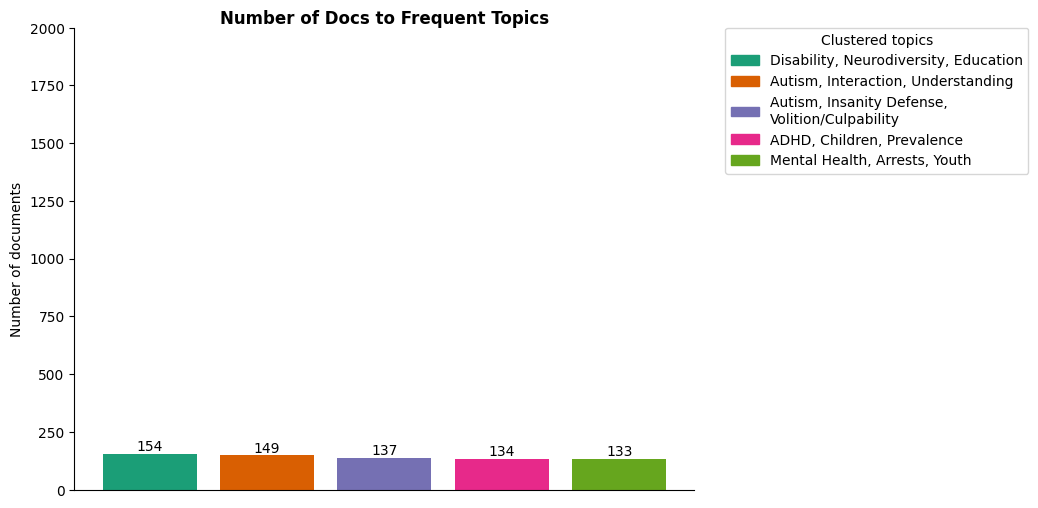

In [ ]:
import matplotlib.patches as mpatches
from textwrap import fill

colors=[plt.cm.Dark2(i) for i in range(len(plot_dbscanvalues))]

fig, ax = plt.subplots(figsize = (8,6))
bar_container = ax.bar(x=range(len(plot_dbscanvalues)),height=plot_dbscanvalues.values,color=colors)
ax.set(ylabel='Number of documents', ylim=(0, 2000))
ax.bar_label(bar_container, fmt='{:,.0f}')
ax.set_xticks([])

legend_labels=[]
for i in dbscantopics:
  if len(i) >45:
    i = fill(i, 45)
  legend_labels.append(i)


legend_handles=[]
for i in range(len(colors)):
  patch = mpatches.Patch(color=colors[i], label=legend_labels[i])
  legend_handles.append(patch)


ax.legend(handles=legend_handles,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Clustered topics')
ax.spines[['right', 'top']].set_visible(False)
ax.set_title(label='Number of Docs to Frequent Topics',pad=1.55, fontweight='heavy')

plt.show()

# BERTopic

In [ ]:
try:
  from bertopic import BERTopic
  from sentence_transformers import SentenceTransformer
  from hdbscan import HDBSCAN
except ModuleNotFoundError:
  !pip install bertopic -q
  !pip install sentence_transformers -q
  !pip install hdbscan -q

  from bertopic import BERTopic
  from sentence_transformers import SentenceTransformer
  from hdbscan import HDBSCAN

In [ ]:
embeds['sentences']

array(['As a result, in the space of  popular media, the neurodivergent and the disabled look at themselves through images, through  the eyes that are unable to truly recognize them.',
       'This is because a factor like education, which does not  expire, instead aids in the ability to obtain further positive protective factors,  including things like a job or continued education.',
       'This association may be an artifact of the overlap in symptoms of impulsivity and poor self-control used to diagnose both conditions.',
       ...,
       'See Wishik, supra  note 3, at 115 (describing the manner in which ADHD can be used as a diminished capacity defense).',
       'Conversely, Black parents’ view of ADHD as a stigmatization impeded their ability to accept a diagnosis as a mechanism for gaining access to accommodations.',
       "By better understanding these individuals' problems, criminal jus- tice personnel can refer them to treatment programs designed to help them control thei

In [ ]:
check_point = 'all-MiniLM-L6-v2'

# Load Sentence Transformer for embeddings
embedding_model = SentenceTransformer(check_point)

# Clustering model
cluster_model = HDBSCAN(min_cluster_size=35,
                        cluster_selection_method='eom',
                        prediction_data=True)

# Topic model
topic_model = BERTopic(embedding_model=embedding_model,
                       hdbscan_model=cluster_model,
                       top_n_words=10,
                       verbose=True)

# Fit the model
topics, probs = topic_model.fit_transform(embeds['sentences'])

2024-07-22 10:48:32,163 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2024-07-22 10:49:02,135 - BERTopic - Embedding - Completed ✓
2024-07-22 10:49:02,137 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-22 10:51:22,707 - BERTopic - Dimensionality - Completed ✓
2024-07-22 10:51:22,710 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

2024-07-22 10:51:32,038 - BERTopic - Cluster - Completed ✓
2024-07-22 10:51:32,072 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-22 10:51:35,092 - BERTopic - Representation - Completed ✓


In [ ]:
# Save intertopic distance map as HTML file
topic_model.visualize_topics().write_html("/content/drive/MyDrive/REU Data Folder/intertopic_dist_map.html")

# Save topic-terms barcharts as HTML file
topic_model.visualize_barchart(top_n_topics = 10).write_html("/content/drive/MyDrive/REU Data Folder/barchart.html")

# Save documents projection as HTML file
topic_model.visualize_documents(embeds['sentences']).write_html("/content/drive/MyDrive/REU Data Folder/projections.html")

# Save topics dendrogram as HTML file
topic_model.visualize_hierarchy().write_html("/content/drive/MyDrive/REU Data Folder/hieararchy.html")

In [ ]:
import IPython.display
IPython.display.HTML(filename="/content/drive/MyDrive/REU Data Folder/intertopic_dist_map.html")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
IPython.display.HTML(filename="/content/drive/MyDrive/REU Data Folder/barchart.html")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
IPython.display.HTML(filename="/content/drive/MyDrive/REU Data Folder/projections.html")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
IPython.display.HTML(filename="/content/drive/MyDrive/REU Data Folder/hieararchy.html")

Output hidden; open in https://colab.research.google.com to view.